# DALI machine optics

## Najmeh Mirian 
4 Desmber 2024

Here we have the lattices of Positron source and transfer line to FIR laser. 


In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


# The linac section 
T0 is gun section 
T1 is the transport to the sepration including the kicker and diagnostic section 

In [2]:
from DALI_lattice import *
# this is the lattice of the accelerator section injector to 1,5m after RF kicker 
#T0 is the transfer line from SRF gun to linac section
#T1 is the transfer linac to seperation 

In [3]:
lat = MagneticLattice(T02T1) 

In [5]:
# initialization of Twiss object
tws0 = Twiss()
# defining initial twiss parameters
tws0.beta_x = 29.171
tws0.beta_y = 29.171
tws0.alpha_x = 10.955
tws0.alpha_y = 10.955
# defining initial electron energy in GeV
tws0.E = 0.005 #  5 mev /// 0.005 Gev 

# calculate optical functions with initial twiss parameters
tws = twiss(lat, tws0, nPoints=None)

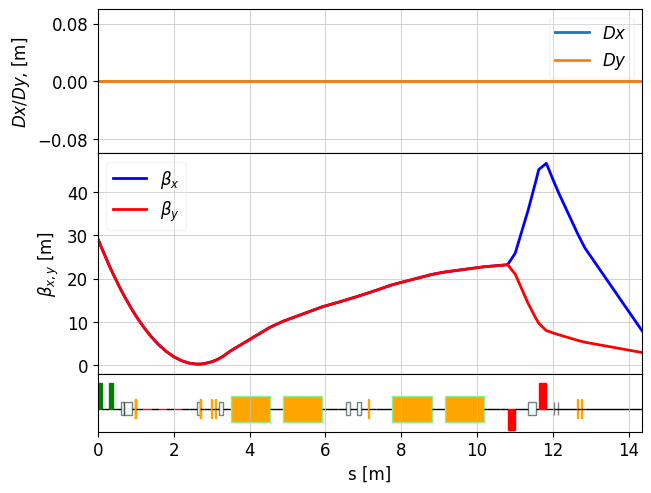

In [6]:
plot_opt_func(lat, tws, top_plot=["Dx", "Dy"],  fig_name="i1", legend=False)
plt.show()

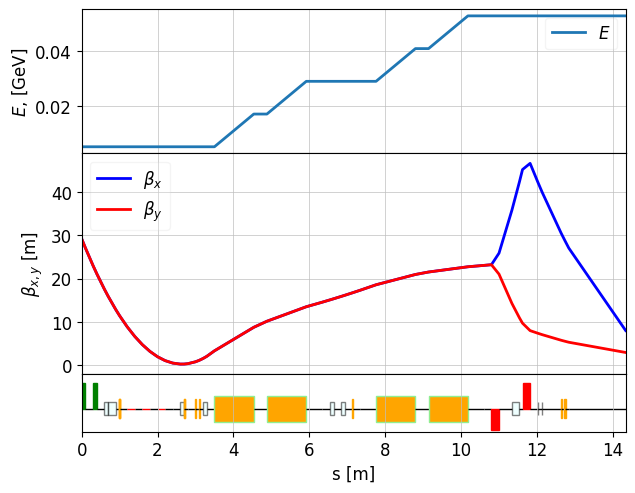

In [7]:
plot_opt_func(lat, tws, top_plot=["E"], fig_name=0, legend=False)
plt.show()

# POSITRON Sourcec 
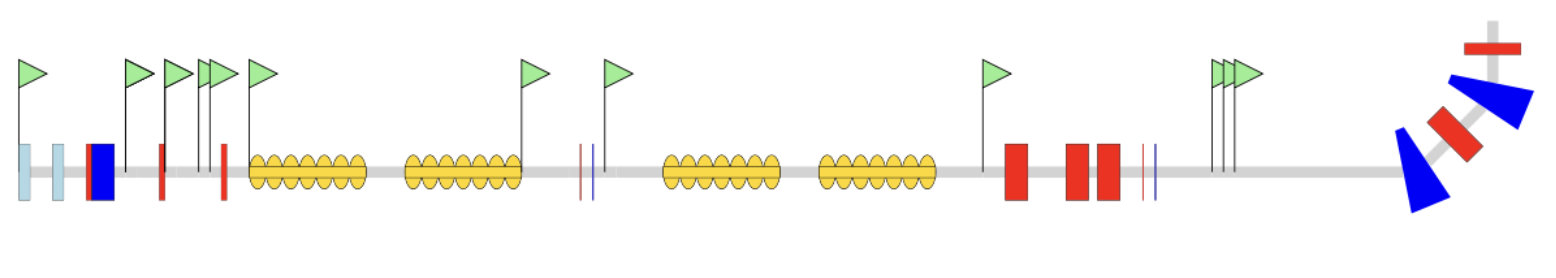

In [8]:
# Elbe bending magnect parameters  90 deg spreader 
import math
# deflection angle of dipoles
fl1b_a = 45.0 * math.pi / 180.0
# reference trajectory length through dipoles
fl1b_l = 0.300 * fl1b_a
# edge angles of dipoles
fl1b_e = 11.25 * math.pi / 180.0
print(fl1b_a, fl1b_l,fl1b_e)

0.7853981633974483 0.23561944901923448 0.19634954084936207


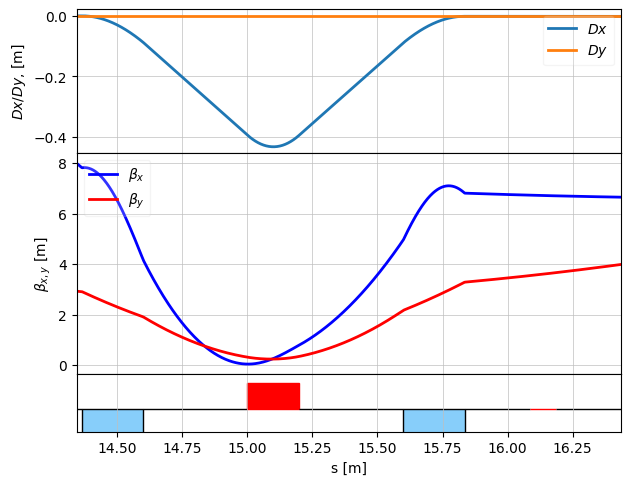

In [30]:

# Design of Transfer to Position Source  TPS

D020 = Drift(l=0.02)
D025 = Drift(l=0.25)
D040 = Drift(l=0.40)
#D025 = Drift(l=0.25)

# defining of the quads
Q1TPS = Quadrupole(l=0.2, k1=18.2)
Q2TPS= Quadrupole(l=0.1, k1=0)
# defining of the bending magnet
#Septom magnet 
BTPS=SBend(l=fl1b_l, angle=-fl1b_a, e1=-fl1b_e, e2=-fl1b_e, tilt=0.0, fint=0.0, eid='PS_bend')

Tranport_to_PS=(D020,BTPS, D040, Q1TPS, D040, BTPS, D025, Q2TPS, D025)
lat_Tranport_to_PS = MagneticLattice(Tranport_to_PS)

tws_Tranport_to_PS = twiss(lat_Tranport_to_PS,tws[-1] ,nPoints=1000)

# plot optical functions.
plot_opt_func(lat_Tranport_to_PS, tws_Tranport_to_PS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

length of the cell:  16.135238898038462 m


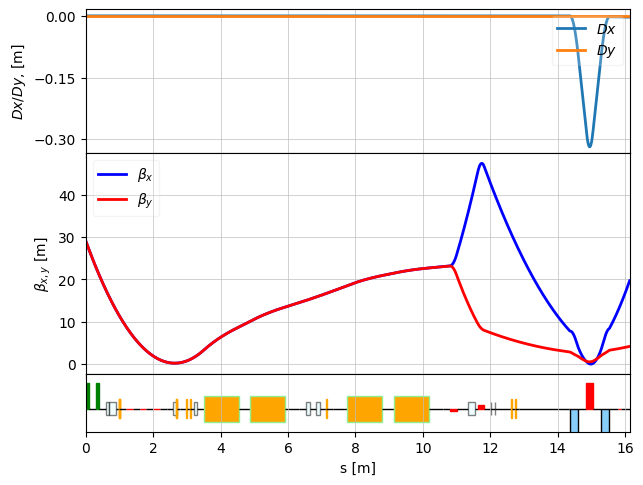

In [10]:
PS_lat=(T02T1, Tranport_to_PS)

latPS = MagneticLattice(PS_lat)
# to see total lenth of the lattice 
print("length of the cell: ", latPS.totalLen, "m")

twsPS = twiss(latPS,tws0 ,nPoints=1000)
# plot optical functions.
plot_opt_func(latPS, twsPS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

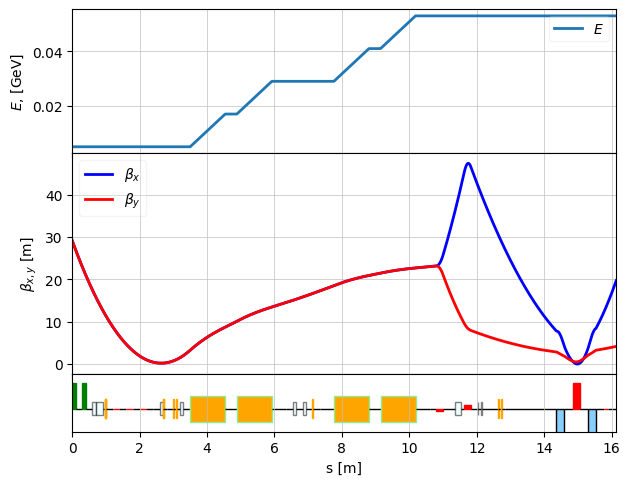

In [11]:
plot_opt_func(latPS, twsPS, top_plot = ["E"], legend=False, font_size=10)
plt.show()

# FIR sources 
Far infrared radition 

Design of Transfer line to Far infrared radiation  (TIR)

We have to branched , ther are similar north and sauth branch 


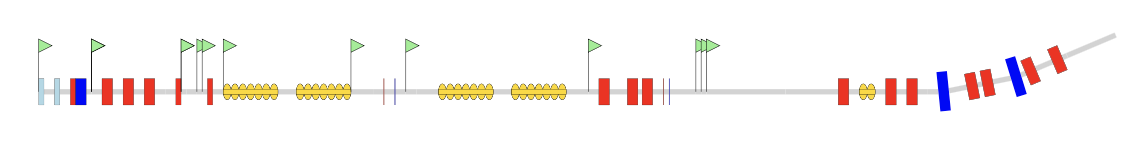

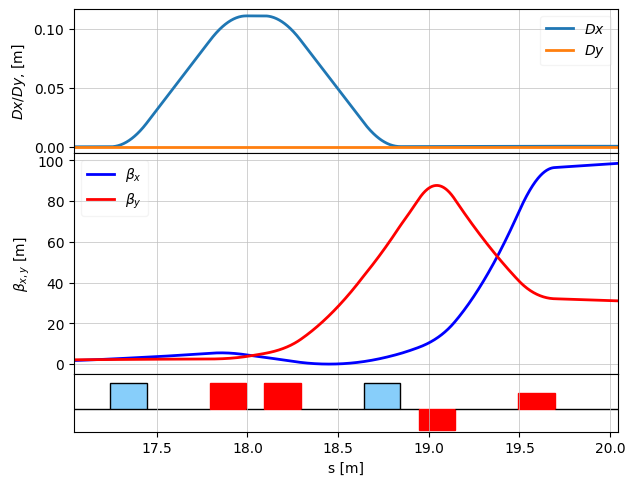

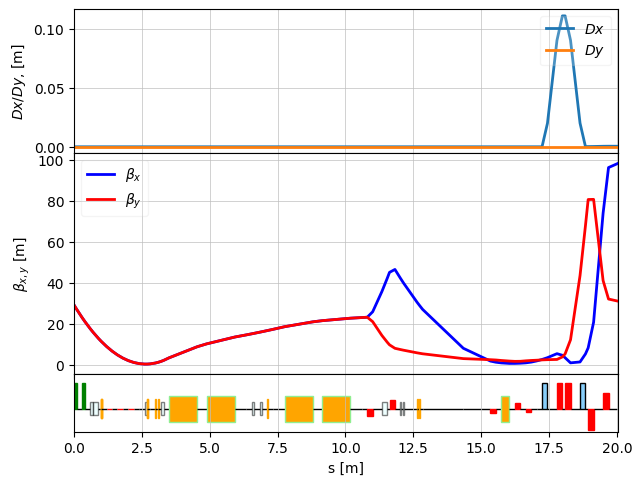

In [72]:

D100 = Drift(l=1)
D020 = Drift(l=0.2)
D020 = Drift(l=0.2)
D035=Drift(l=0.35)

QTIR1 = Quadrupole(l=0.2, k1=-1.5)
QTIR2 = Quadrupole(l=0.20, k1=2)
QTIR3 = Quadrupole(l=0.2, k1=-1.3)

ChirRC1 = Cavity(l=0.3, v=0.012, freq=3.9e9, phi=20.0, eid='chirper')
###
cellTIR = (D100, QTIR1, D020, ChirRC1, D020, QTIR2, D020, QTIR3, D020)
latTIR = MagneticLattice(cellTIR)
twsTIR= twiss(latTIR,tws[-1] ,nPoints=1000)
#
BTIR=SBend(l=0.2, angle=0.2, e1=0.1, e2=0.1, tilt=0.0, fint=0.0, eid='IR_bend')
QTIR4 = Quadrupole(l=0.2, k1=9.65)
QTIR5 = Quadrupole(l=0.2, k1=-8)
QTIR6 = Quadrupole(l=0.2, k1=6)

D010=Drift(l=0.1)
CELLTSIR=(D020, BTIR, D035, QTIR4,D010, QTIR4, D035,BTIR, D010,QTIR5, D035,QTIR6,D035)
latTSIR = MagneticLattice(CELLTSIR)
twsTSIR= twiss(latTSIR,twsTIR[-1] ,nPoints=1000)
# plot optical functions.
plot_opt_func(latTSIR, twsTSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()
TIR_cell=(T02T1,cellTIR, CELLTSIR )
TSIR_lat = MagneticLattice(TIR_cell)
twsSIR= twiss(TSIR_lat,tws0 )


# plot optical functions.
plot_opt_func(TSIR_lat, twsSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

# Second line

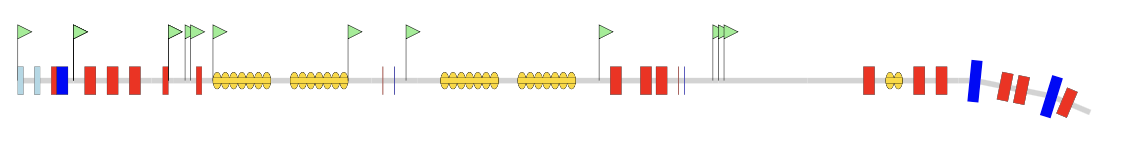

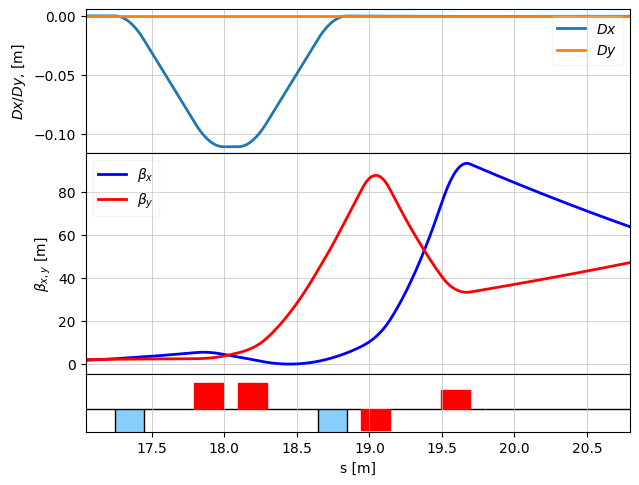

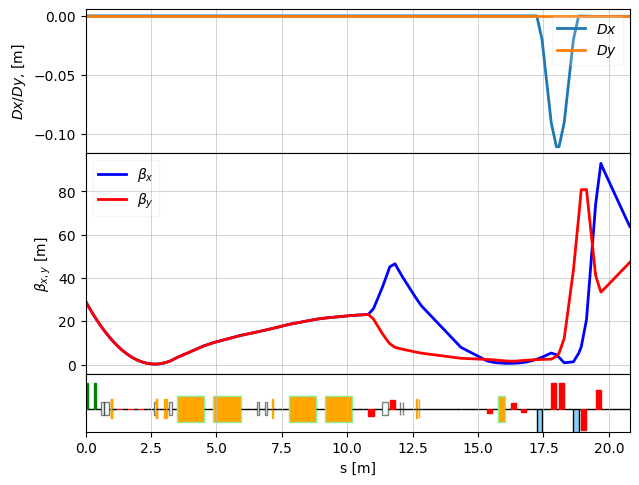

In [81]:
BTIR2=SBend(l=0.2, angle=-0.2, e1=-0.1, e2=-0.1, tilt=0.0, fint=0.0, eid='IR_bend')
QTIR2_1 = Quadrupole(l=0.2, k1=9.65)
QTIR2_2 = Quadrupole(l=0.2, k1=-8)
QTIR2_3 = Quadrupole(l=0.2, k1=7)
#QTIR8 = Quadrupole(l=0.2, k1=-8.5)
D035=Drift(l=0.35)

CELLTSIR2=(D020, BTIR2, D035, QTIR2_1,D010, QTIR2_1, D035,BTIR2, D010,QTIR2_2, D035, QTIR2_3, D010,D100)

latTSIR2 = MagneticLattice(CELLTSIR2)
twsTSIR2= twiss(latTSIR2,twsTIR[-1] ,nPoints=1000)

plot_opt_func(latTSIR2, twsTSIR2, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()
TIR_cell2=(T02T1,cellTIR, CELLTSIR2 )
TSIR_lat2= MagneticLattice(TIR_cell2)
twsSIR2= twiss(TSIR_lat2,tws0 )


plot_opt_func(TSIR_lat2, twsSIR2, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [14]:

#

In [15]:
#
#


#

##

#######################################################################################################################################